# Bank Loan Analysis

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 

In [4]:
df = pd.read_excel("C:\\Users\\USER\\Desktop\\Resume Projects\\bank_loan_analysis\\bank_loan_data_excel.xlsx")

In [5]:
df.head(10)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
5,1062608,CA,INDIVIDUAL,3 years,Studio 94 Corp,C,RENT,2021-07-17,2021-03-16,2021-08-12,...,C3,36 months,Not Verified,28000.0,0.1260,275.96,0.1465,8000,11,8637
6,1067441,TX,INDIVIDUAL,10+ years,American Airlines,C,MORTGAGE,2021-11-19,2021-06-14,2021-12-13,...,C2,36 months,Verified,94800.0,0.2453,205.86,0.1427,6000,30,7218
7,1066424,PA,INDIVIDUAL,10+ years,SCI Mahanoy,A,OWN,2021-06-11,2021-07-14,2021-07-14,...,A4,36 months,Source Verified,59000.0,0.0665,172.10,0.0790,5500,23,6172
8,1065254,FL,INDIVIDUAL,10+ years,Tech Data Corp,A,MORTGAGE,2021-09-02,2021-06-15,2021-10-12,...,A5,36 months,Verified,116400.0,0.0394,762.08,0.0890,24000,31,8650
9,1064589,MI,INDIVIDUAL,10+ years,teltow contracting,B,MORTGAGE,2021-02-09,2021-03-16,2021-03-16,...,B5,60 months,Not Verified,36000.0,0.1773,93.21,0.1269,4125,21,5551


In [6]:
df.tail(10)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38566,1007647,VA,INDIVIDUAL,1 year,"Ebert & Baumann Consulting Engineers, In",C,RENT,2021-11-11,2021-05-16,2021-05-16,...,C1,60 months,Source Verified,72000.0,0.0117,345.08,0.1349,15000,7,18588
38567,1020423,GA,INDIVIDUAL,< 1 year,Triton Digital,D,RENT,2021-11-11,2021-05-16,2021-05-16,...,D3,60 months,Source Verified,43500.0,0.0041,164.99,0.1727,6600,9,8890
38568,792945,IL,INDIVIDUAL,3 years,Intertek,E,RENT,2021-06-11,2021-05-16,2021-05-16,...,E2,60 months,Source Verified,57040.5,0.0496,512.13,0.1839,20000,20,29702
38569,844956,VA,INDIVIDUAL,2 years,SAIC,G,RENT,2021-08-11,2021-05-16,2021-05-16,...,G1,60 months,Source Verified,150000.0,0.0888,113.50,0.2211,4100,29,6463
38570,841271,CT,INDIVIDUAL,1 year,Travelers,D,MORTGAGE,2021-08-11,2021-04-16,2021-05-16,...,D2,60 months,Source Verified,56000.0,0.1200,291.76,0.1599,12000,18,16587
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


### Metadata of the Bank Loan Data

In [7]:
print("No. of rows in the dataset:", df.shape[0])
print("No. of columns in the dataset:", df.shape[1])

No. of rows in the dataset: 38576
No. of columns in the dataset: 24


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

### Data Types

In [9]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [10]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


## Bank Loan Summary

### KPIs

#### A. Loan Applications

#### 1. Total Loan Applications

In [11]:
total_loan_applications = df['id'].count()
print("Total Loan Applications:", total_loan_applications)

Total Loan Applications: 38576


#### 2. MTD - Total Loan Applications

In [12]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_loan_applications = mtd_data['id'].count()
print(f"Month-to-Date Loan Applications (for {latest_issue_date.strftime('%B %Y')}): {mtd_loan_applications}")

Month-to-Date Loan Applications (for December 2021): 4314


#### B. Funded Amount

#### 1. Total Funded Amount

In [13]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_milllions = total_funded_amount / 1_000_000
print("Total Funded Amount (Millions): ${:,.2f}M".format(total_funded_amount_milllions))

Total Funded Amount (Millions): $435.76M


#### 2. MTD - Total Funded Amount

In [14]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount / 1_000_000

print("Month-to-Date Funded Amount (Millions): ${:,.2f}M".format(mtd_total_funded_amount_millions))

Month-to-Date Funded Amount (Millions): $53.98M


#### C. Amount Received

#### 1. Total Amount Received

In [15]:
total_amount_received = df['total_payment'].sum()
total_amount_received_milllions = total_amount_received / 1_000_000
print("Total Amount Receeived (Millions): ${:,.2f}M".format(total_amount_received_milllions))

Total Amount Receeived (Millions): $473.07M


#### 2. MTD - Total Amount Received

In [16]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received / 1_000_000

print("Month-to-Date Amount Received (Millions): ${:,.2f}M".format(mtd_total_amount_received_millions))

Month-to-Date Amount Received (Millions): $58.07M


#### D. Interest Rate

#### 1. Average Interest Rate

In [17]:
average_interest_rate = df['int_rate'].mean() * 100
print("Average Interest Rate: {:.2f}%".format(average_interest_rate))

Average Interest Rate: 12.05%


#### 2. MTD - Average Interest Rate

In [18]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_average_interest_rate = mtd_data['int_rate'].mean() * 100
print("Month-to-Date Average Interest Rate: {:.2f}%".format(mtd_average_interest_rate))

Month-to-Date Average Interest Rate: 12.36%


#### E. Debt-to-Income (DTI) Ratio

#### 1. Average DTI

In [19]:
average_dti = df['dti'].mean() * 100
print("Average DTI: {:.2f}%".format(average_dti))

Average DTI: 13.33%


#### 2. MTD - Average DTI

In [20]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_average_dti = mtd_data['dti'].mean() * 100
print("Month-to-Date Average DTI: {:.2f}%".format(mtd_average_dti)) 

Month-to-Date Average DTI: 13.67%


### Good Loan vs Bad Loan

#### A. Good Loan Metrics

In [21]:
good_loans = df[df['loan_status'].isin(['Fully Paid', 'Current'])]

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_amount_received = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount / 1_000_000
good_loan_amount_received_millions = good_loan_amount_received / 1_000_000

good_loan_percentage = (good_loan_applications / total_loan_applications) * 100

print("Good Loan Applications:", (good_loan_applications))
print("Good Loan Funded Amount (Millions): ${:,.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Amount Received (Millions): ${:,.2f}M".format(good_loan_amount_received_millions))
print("Good Loan Percentage: {:.2f}%".format(good_loan_percentage))

Good Loan Applications: 33243
Good Loan Funded Amount (Millions): $370.22M
Good Loan Amount Received (Millions): $435.79M
Good Loan Percentage: 86.18%


#### B. Bad Loan Metrices

In [22]:
bad_loans = df[df['loan_status'].isin(['Charged Off'])]

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_amount_received = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount / 1_000_000
bad_loan_amount_received_millions = bad_loan_amount_received / 1_000_000

bad_loan_percentage = (bad_loan_applications / total_loan_applications) * 100

print("Bad Loan Applications:", (bad_loan_applications))
print("Bad Loan Funded Amount (Millions): ${:,.2f}M".format(bad_loan_funded_amount_millions))
print("Bad Loan Amount Received (Millions): ${:,.2f}M".format(bad_loan_amount_received_millions))
print("Bad Loan Percentage: {:.2f}%".format(bad_loan_percentage))

Bad Loan Applications: 5333
Bad Loan Funded Amount (Millions): $65.53M
Bad Loan Amount Received (Millions): $37.28M
Bad Loan Percentage: 13.82%


## Bank Loan Overview

### A. Monthly Trend by Issue Date

#### 1. For Total Loan Applications

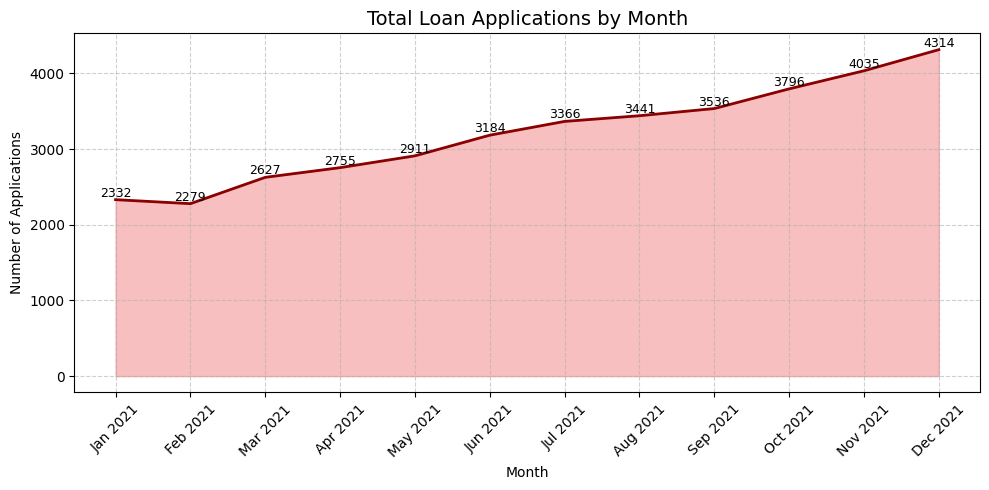

In [26]:
monthly_loan_applications = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['id']
    .count()
    .reset_index(name = 'loan_applications_count')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_loan_applications['month_name'], monthly_loan_applications['loan_applications_count'], color='lightcoral', alpha=0.5)
plt.plot(monthly_loan_applications['month_name'], monthly_loan_applications['loan_applications_count'], color='darkred', linewidth=2)

for i, row in monthly_loan_applications.iterrows():
    plt.text(i, row['loan_applications_count'] + 0.5, f"{row['loan_applications_count']}", ha='center', va='bottom', fontsize=9, rotation=0, color='black')
plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(ticks=range(len(monthly_loan_applications)), labels=monthly_loan_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### 2. For Total Funded Amount

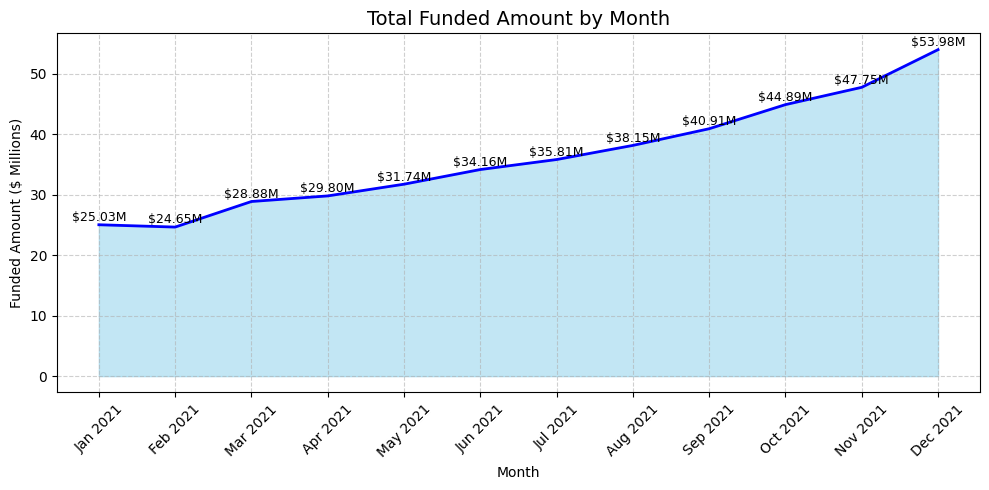

In [ ]:
monthly_funded_amount = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['loan_amount']
    .sum()
    .div(1_000_000)
    .reset_index(name = 'funded_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_funded_amount['month_name'], monthly_funded_amount['funded_amount_millions'], color='skyblue', alpha=0.5)
plt.plot(monthly_funded_amount['month_name'], monthly_funded_amount['funded_amount_millions'], color='blue', linewidth=2)

for i, row in monthly_funded_amount.iterrows():
    plt.text(i, row['funded_amount_millions'] + 0.1, f"${row['funded_amount_millions']:.2f}M", ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ($ Millions)')
plt.xticks(ticks=range(len(monthly_funded_amount)), labels=monthly_funded_amount['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### 3. For Total Amount Received

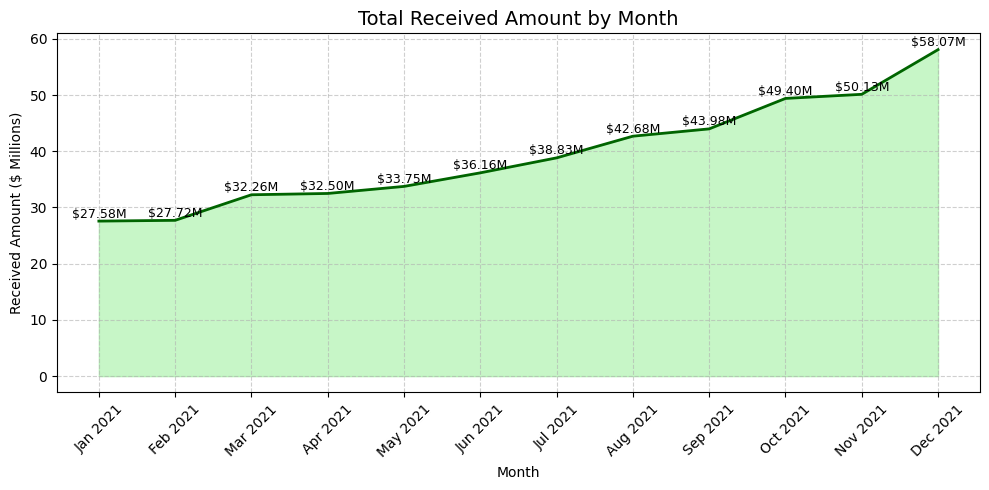

In [ ]:
monthly_amount_received = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['total_payment']
    .sum()
    .div(1_000_000)
    .reset_index(name = 'received_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_amount_received['month_name'], monthly_amount_received['received_amount_millions'], color='lightgreen', alpha=0.5)
plt.plot(monthly_amount_received['month_name'], monthly_amount_received['received_amount_millions'], color='darkgreen', linewidth=2)

for i, row in monthly_amount_received.iterrows():
    plt.text(i, row['received_amount_millions'] + 0.1, f"${row['received_amount_millions']:.2f}M", ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Received Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Received Amount ($ Millions)')
plt.xticks(ticks=range(len(monthly_amount_received)), labels=monthly_amount_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### B. Regional Analysis by state

#### 1. For Total Loan Applications

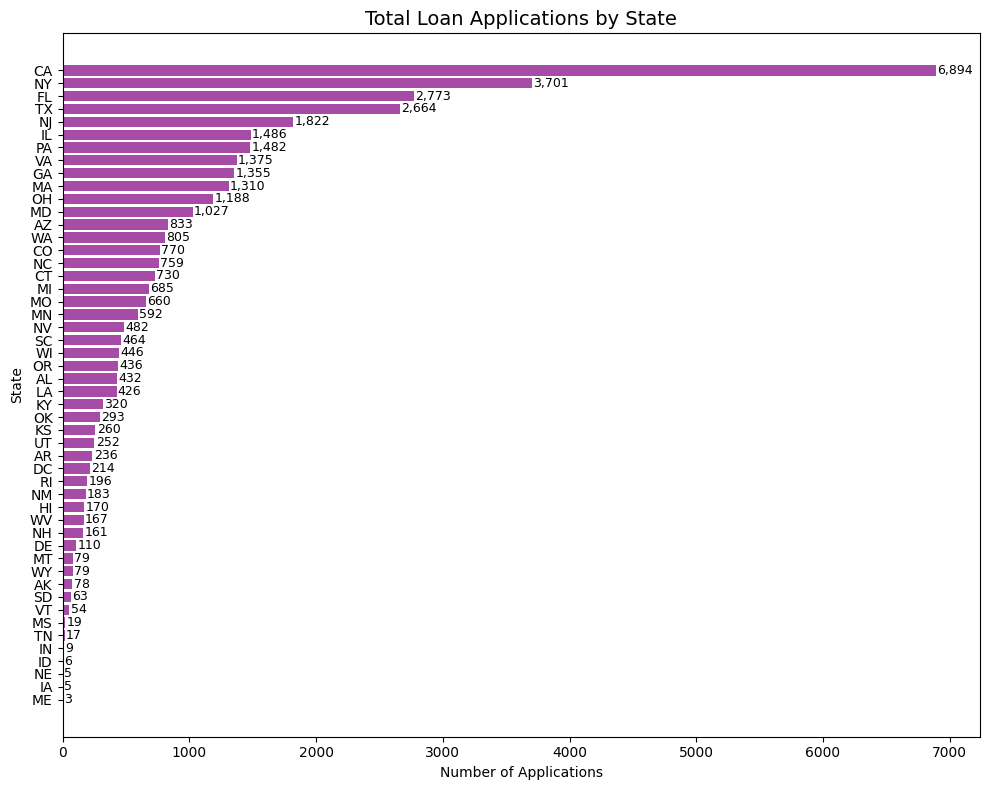

In [ ]:
state_loan_applications = df.groupby('address_state')['id'].count().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
bars = plt.barh(state_loan_applications.index, state_loan_applications.values, color='purple', alpha=0.7)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f"{width:,.0f}", va='center', fontsize=9, color='black')

plt.title('Total Loan Applications by State', fontsize=14)
plt.xlabel('Number of Applications')
plt.ylabel('State')
plt.tight_layout()
plt.show()

#### 2. For Total Funded Amount

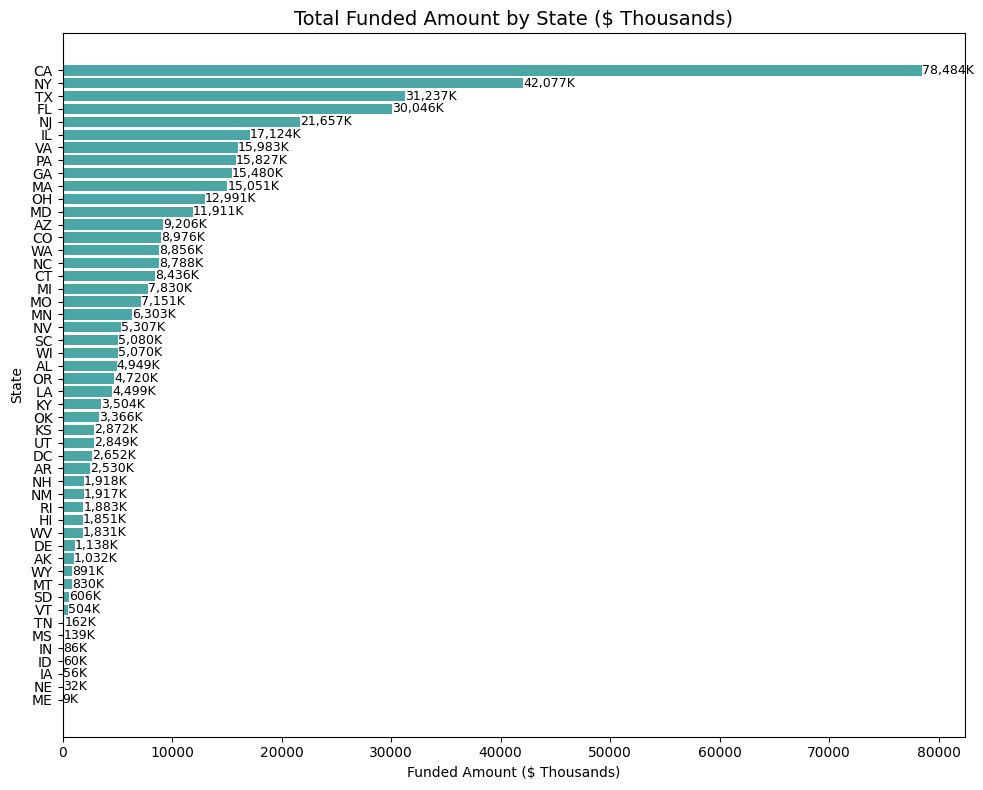

In [ ]:
state_funded_amount = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funded_amount_thousands = state_funded_amount / 1_000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_funded_amount_thousands.index, state_funded_amount_thousands.values, color='teal', alpha=0.7)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f"{width:,.0f}K", va='center', fontsize=9, color='black')

plt.title('Total Funded Amount by State ($ Thousands)', fontsize=14)
plt.xlabel('Funded Amount ($ Thousands)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

#### 3. For Total Amount Received

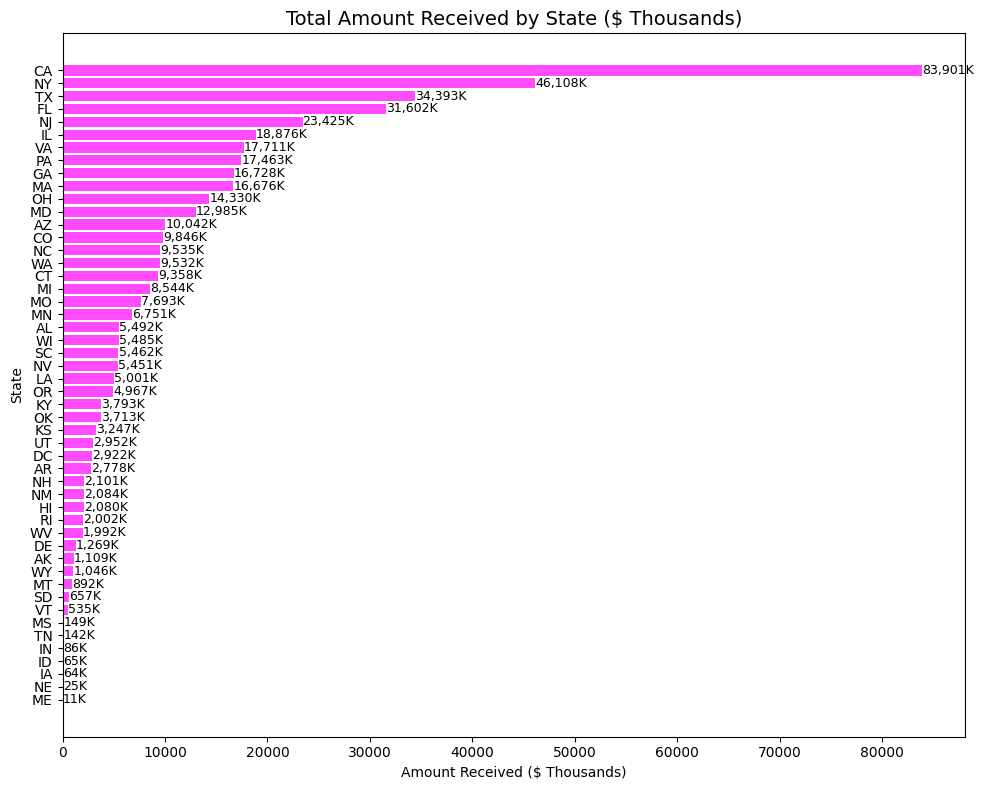

In [ ]:
state_amount_received = df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
state_amount_received_thousands = state_amount_received / 1_000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_amount_received_thousands.index, state_amount_received_thousands.values, color='magenta', alpha=0.7)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f"{width:,.0f}K", va='center', fontsize=9, color='black')

plt.title('Total Amount Received by State ($ Thousands)', fontsize=14)
plt.xlabel('Amount Received ($ Thousands)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### C. Loan Term Analysis

#### 1. For Total Loan Applications

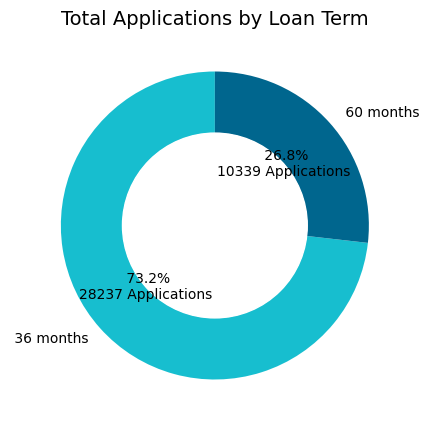

In [27]:
term_applications = df.groupby('term')['id'].count()

plt.figure(figsize=(5, 5))
plt.pie(
    term_applications,
    labels=term_applications.index,
    autopct=lambda p: f" {p:.1f}%\n{p*sum(term_applications)/100:.0f} Applications",
    startangle=90,
    colors=["#17becf","#00668e"],
    wedgeprops={'width': 0.4}
)

plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.title('Total Applications by Loan Term', fontsize=14)
plt.show()

#### 2. For Total Funded Amount

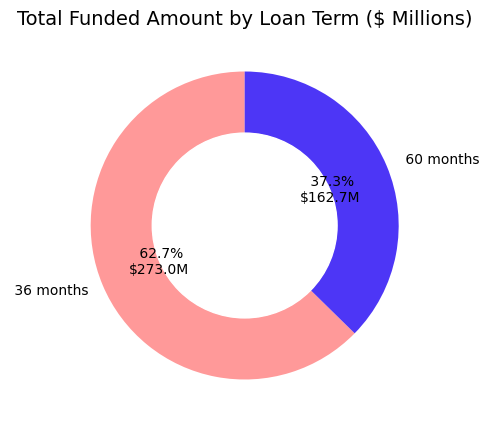

In [ ]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1_000_000

plt.figure(figsize=(5, 5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f" {p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle=90,
    colors=['#ff9999',"#4d36f6"],
    wedgeprops={'width': 0.4}
)

plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.title('Total Funded Amount by Loan Term ($ Millions)', fontsize=14)
plt.show()

#### 3. For Total Amount Received

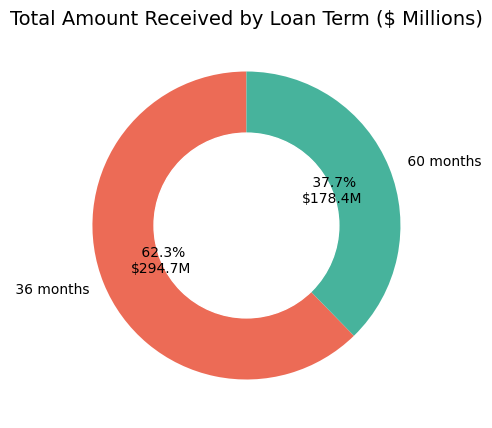

In [28]:
term_amount_received_millions = df.groupby('term')['total_payment'].sum() / 1_000_000

plt.figure(figsize=(5, 5))
plt.pie(
    term_amount_received_millions,
    labels=term_amount_received_millions.index,
    autopct=lambda p: f" {p:.1f}%\n${p*sum(term_amount_received_millions)/100:.1f}M",
    startangle=90,
    colors=['#ec6b56',"#47b39c"],
    wedgeprops={'width': 0.4}
)

plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.title('Total Amount Received by Loan Term ($ Millions)', fontsize=14)
plt.show()

### D. Employement Length Analysis 

#### 1. For Total Loan Applications

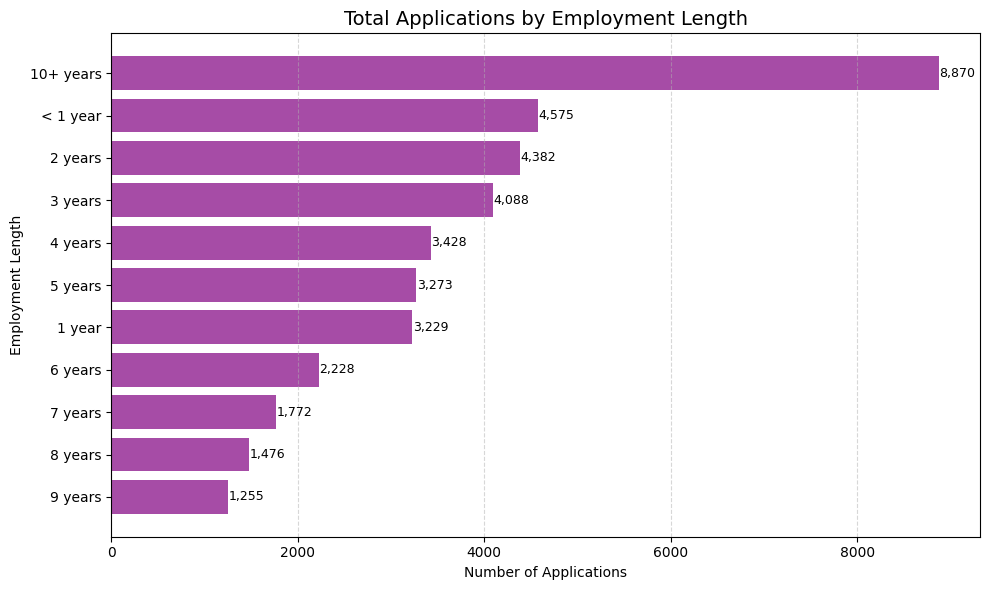

In [29]:
emp_applications = df.groupby('emp_length')['id'].count().sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_applications.index, emp_applications.values, color='purple', alpha=0.7)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2, f"{width:,.0f}", va='center', fontsize=9, color='black')

plt.title('Total Applications by Employment Length', fontsize=14)
plt.xlabel('Number of Applications')
plt.ylabel('Employment Length')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 2. For Total Funded Amount

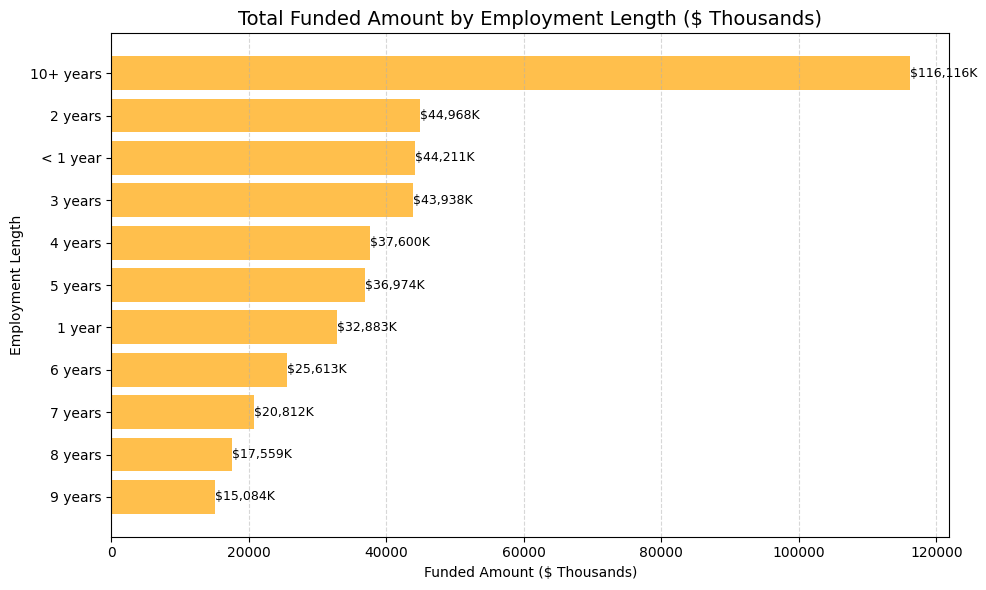

In [30]:
emp_funded_amount = df.groupby('emp_length')['loan_amount'].sum().sort_values() / 1_000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_funded_amount.index, emp_funded_amount.values, color='orange', alpha=0.7)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2, f"${width:,.0f}K", va='center', fontsize=9, color='black')

plt.title('Total Funded Amount by Employment Length ($ Thousands)', fontsize=14)
plt.xlabel('Funded Amount ($ Thousands)')
plt.ylabel('Employment Length')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 3. For Total Amount Received

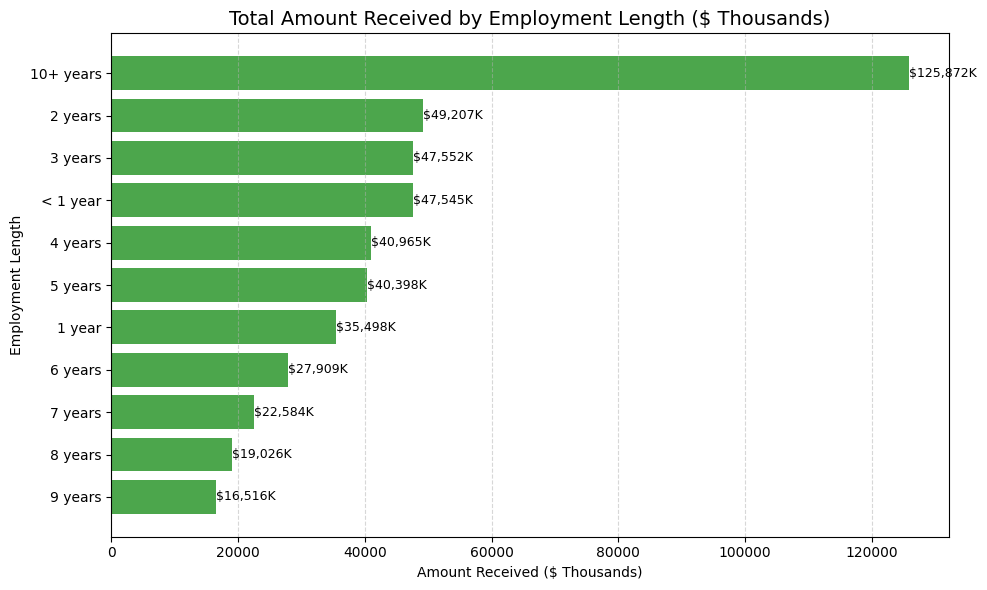

In [31]:
emp_amount_received = df.groupby('emp_length')['total_payment'].sum().sort_values() / 1_000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_amount_received.index, emp_amount_received.values, color='green', alpha=0.7)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2, f"${width:,.0f}K", va='center', fontsize=9, color='black')

plt.title('Total Amount Received by Employment Length ($ Thousands)', fontsize=14)
plt.xlabel('Amount Received ($ Thousands)')
plt.ylabel('Employment Length')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### E. Loan Purpose Breakdown 

#### 1. For Total Loan Applications

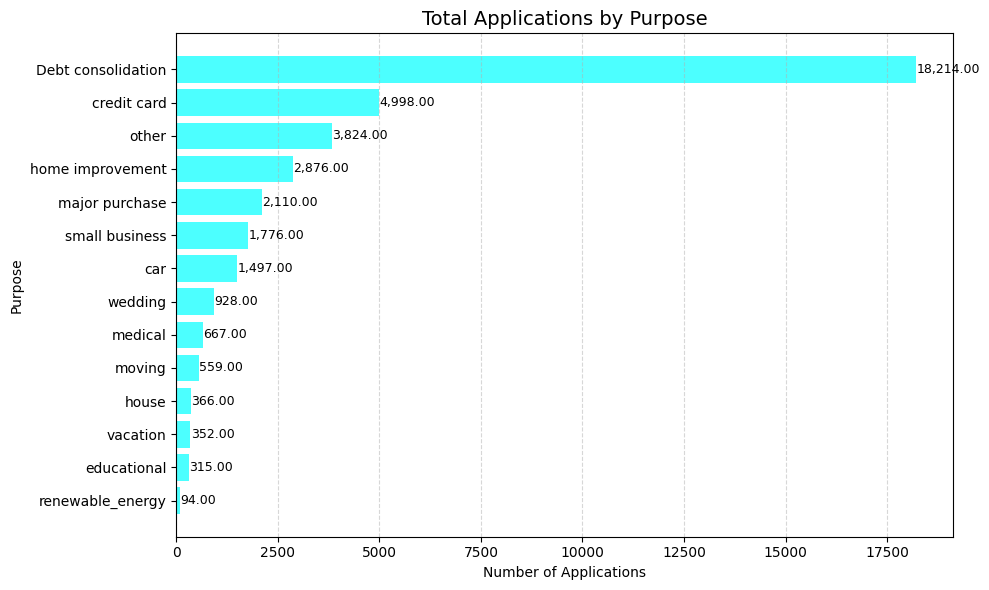

In [32]:
purpose_applications = df.groupby('purpose')['id'].count().sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_applications.index, purpose_applications.values, color='cyan', alpha=0.7)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2, f"{width:,.2f}", va='center', fontsize=9, color='black')

plt.title('Total Applications by Purpose', fontsize=14)
plt.xlabel('Number of Applications')
plt.ylabel('Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 2. For Total Funded Amount

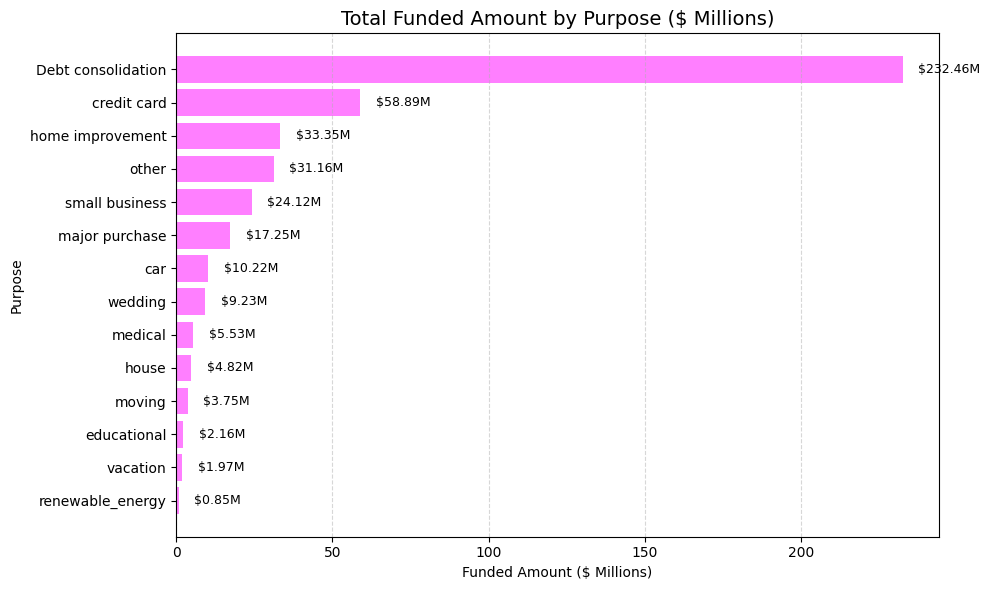

In [33]:
purpose_funded_amount_millions = df.groupby('purpose')['loan_amount'].sum().sort_values() / 1_000_000

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_funded_amount_millions.index, purpose_funded_amount_millions.values, color='magenta', alpha=0.5)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2, f"${width:,.2f}M", va='center', fontsize=9, color='black')

plt.title('Total Funded Amount by Purpose ($ Millions)', fontsize=14)
plt.xlabel('Funded Amount ($ Millions)')
plt.ylabel('Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 3. For Total Amount Received

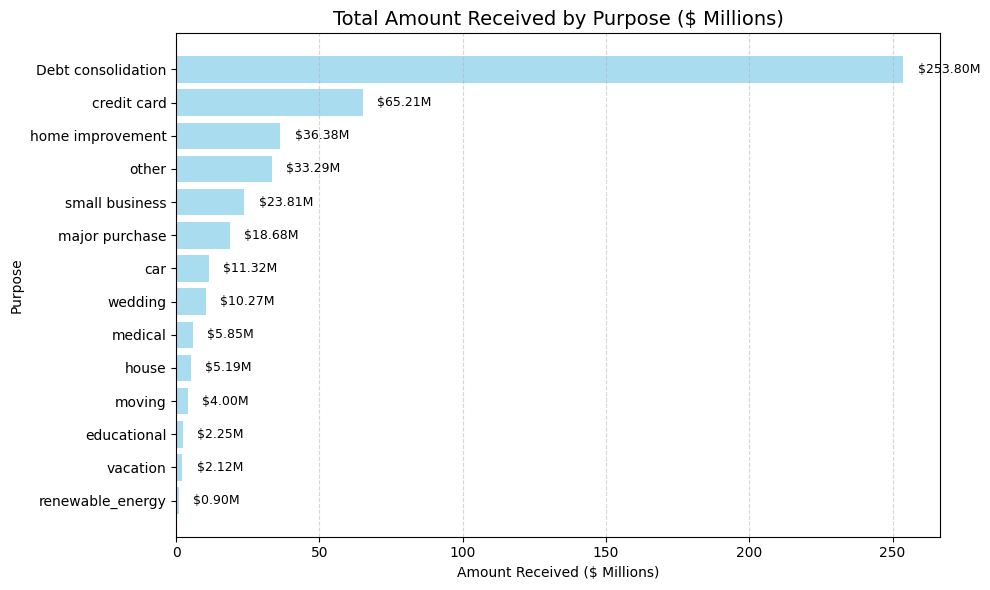

In [35]:
purpose_amount_received_millions = df.groupby('purpose')['total_payment'].sum().sort_values() / 1_000_000

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_amount_received_millions.index, purpose_amount_received_millions.values, color='skyblue', alpha=0.7)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2, f"${width:,.2f}M", va='center', fontsize=9, color='black')

plt.title('Total Amount Received by Purpose ($ Millions)', fontsize=14)
plt.xlabel('Amount Received ($ Millions)')
plt.ylabel('Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### F. Home Ownership Analysis 

#### 1. For Total Loan Applications

In [36]:
home_ownership_applications = df.groupby('home_ownership')['loan_amount'].count().reset_index()

fig = px.treemap(
    home_ownership_applications,
    path=['home_ownership'],
    values='loan_amount',
    title='Total Applications by Home Ownership',
    color='loan_amount',
    color_continuous_scale='teal'
)

fig

#### 2. For Total Funded Amount

In [37]:
home_funding_amount = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding_amount['loan_amount_millions'] = home_funding_amount['loan_amount'] / 1_000_000

fig = px.treemap(
    home_funding_amount,
    path=['home_ownership'],
    values='loan_amount_millions',
    title='Total Funded Amount by Home Ownership ($ Millions)',
    color='loan_amount_millions',
    color_continuous_scale='Blues'
)

fig

#### 3. For Total Amount Received

In [38]:
home_amount_received = df.groupby('home_ownership')['total_payment'].sum().reset_index()
home_amount_received['loan_amount_millions'] = home_amount_received['total_payment'] / 1_000_000

fig = px.treemap(
    home_amount_received,
    path=['home_ownership'],
    values='loan_amount_millions',
    title='Total Amount Received by Home Ownership ($ Millions)',
    color='loan_amount_millions',
    color_continuous_scale='purples'
)

fig